# Intergenerational Mobility across South Asian nation

In [2]:
%%stata -doutd gdim
use "GDIM_2021_09_South Asia.dta"

In [3]:
gdim.head()

,country,code,region,region_noHICgroup,incgroup2,incgroup3,incgroup4,fragile,survey,year,...,COR,BETA,MU050,BHQ4,Q4Q4,BHQ1,BHQ2,BHQ3,Q4BH,Q4child
0,Afghanistan,AFG,5,5,1,1,1,1,NRVA,2011,...,0.521676,0.802107,38.267929,0.115412,0.576567,0.343300,0.325300,0.215988,0.160665,0.250315
1,Afghanistan,AFG,5,5,1,1,1,1,NRVA,2011,...,0.576251,0.848156,31.926859,0.069982,0.505354,0.439815,0.384448,0.105754,0.284408,0.216944
2,Afghanistan,AFG,5,5,1,1,1,1,NRVA,2011,...,0.521442,0.807674,39.630493,0.125021,0.599029,0.322886,0.312750,0.239342,0.121790,0.258574
3,Afghanistan,AFG,5,5,1,1,1,1,NRVA,2011,...,0.483760,0.514428,40.513165,0.128599,0.549514,0.335149,0.316313,0.219938,0.192943,0.250296
4,Afghanistan,AFG,5,5,1,1,1,1,NRVA,2011,...,0.486349,0.491792,31.846794,0.081535,0.491902,0.429669,0.378788,0.110007,0.315896,0.211575


In [4]:
gdim.columns

Index(['country', 'code', 'region', 'region_noHICgroup', 'incgroup2',
       'incgroup3', 'incgroup4', 'fragile', 'survey', 'year', 'status',
       'cohort', 'parent', 'child', 'obs', 'P1', 'P2', 'P3', 'P4', 'P5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'MEANp', 'MEANc', 'SDp', 'SDc', 'MLD_psu',
       'CAT', 'YOS', 'DIF', 'MIX', 'CAT_ISCED0', 'CAT_ISCED1', 'CAT_ISCED2',
       'CAT_ISCED34', 'CAT_ISCED5678', 'COR', 'BETA', 'MU050', 'BHQ4', 'Q4Q4',
       'BHQ1', 'BHQ2', 'BHQ3', 'Q4BH', 'Q4child'],
      dtype='object')

In [5]:
%%stata -doutd gdim
keep if parent == "avg" & child == "all"     

(304 observations deleted)


In [6]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
%%stata -doutd gdim1
 drop if cohort == 1940

(5 observations deleted)


# Educational attainment

In [8]:
cohort = [1950,1960,1970,1980]
meanC_all_bh=list(gdim1[gdim1.country == 'Bhutan'].MEANc)
meanC_all_ind=list(gdim1[gdim1.country == 'India'].MEANc)
meanC_all_sri=list(gdim1[gdim1.country == 'Sri Lanka'].MEANc)
meanC_all_nep=list(gdim1[gdim1.country == 'Nepal'].MEANc)
meanC_all_pak=list(gdim1[gdim1.country == 'Pakistan'].MEANc)

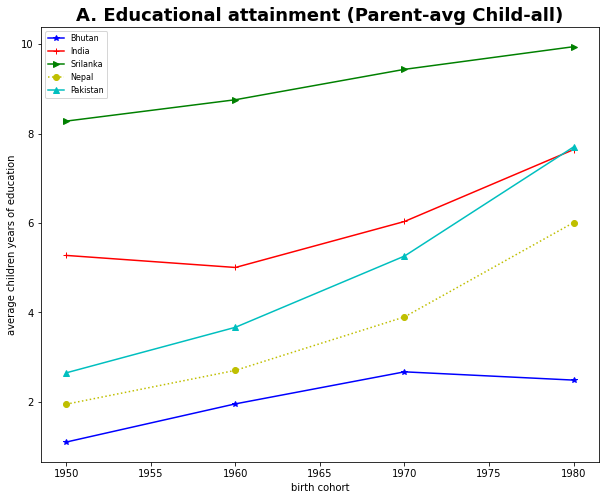

In [18]:
plt.figure(figsize=(10,8))
plt.title('A. Educational attainment (Parent-avg Child-all)', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.plot(cohort,meanC_all_bh , 'b*-', label='Bhutan')
plt.plot(cohort, meanC_all_ind, 'r+-',label='India')
plt.plot(cohort, meanC_all_sri, 'g>-',label='Srilanka')
plt.plot(cohort, meanC_all_nep, 'yo:',label='Nepal')
plt.plot(cohort, meanC_all_pak, 'c^-',label='Pakistan')
plt.legend(loc='best',prop={'size': 8})
plt.xlabel('birth cohort')
plt.ylabel('average children years of education')
plt.show()

# Average Educatoinal years (parents-avg Child-all)

<AxesSubplot:>

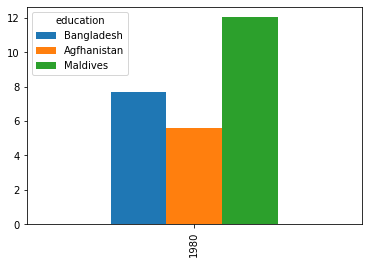

In [11]:
df = pd.DataFrame([[7.692939281463623,5.582400798797607,12.039680480957031]],
                  index=[1980],
                  columns=pd.Index(['Bangladesh', 'Agfhanistan', 'Maldives'], name='education'))
df
df.plot.bar()


# Intergeneatinal Mobility

In [12]:
cohort = [1950,1960,1970,1980]
abs_gdim_bh=list(gdim1[gdim1.country == 'Bhutan'].CAT)
abs_gdim_ind=list(gdim1[gdim1.country == 'India'].CAT)
abs_gdim_sri=list(gdim1[gdim1.country == 'Sri Lanka'].CAT)
abs_gdim_nep=list(gdim1[gdim1.country == 'Nepal'].CAT)
abs_gdim_pak=list(gdim1[gdim1.country == 'Pakistan'].CAT)

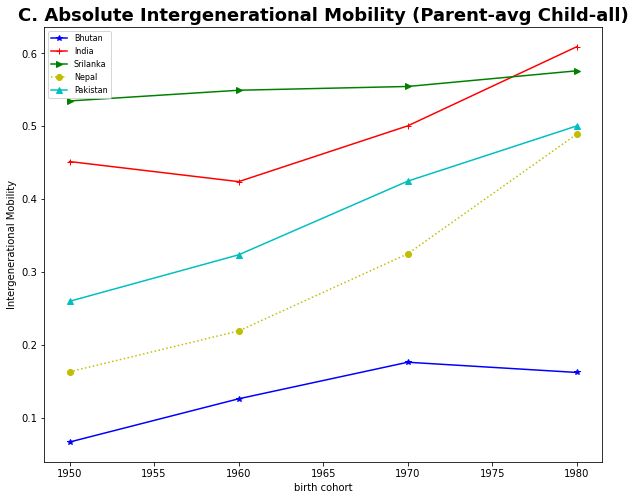

In [13]:
plt.figure(figsize=(10,8))
plt.title('C. Absolute Intergenerational Mobility (Parent-avg Child-all)', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.plot(cohort, abs_gdim_bh , 'b*-', label='Bhutan')
plt.plot(cohort, abs_gdim_ind, 'r+-',label='India')
plt.plot(cohort, abs_gdim_sri, 'g>-',label='Srilanka')
plt.plot(cohort, abs_gdim_nep, 'yo:',label='Nepal')
plt.plot(cohort,abs_gdim_pak , 'c^-',label='Pakistan')
plt.legend(loc=2,prop={'size': 8})
plt.xlabel('birth cohort')
plt.ylabel('Intergenerational Mobility')
plt.show()

# Expected educational Child Rank

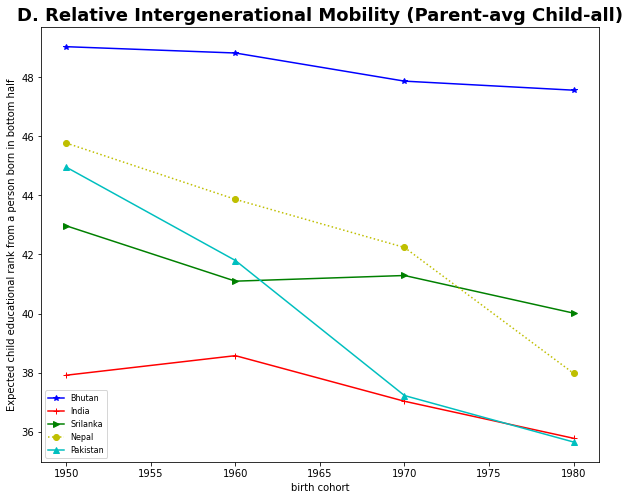

In [14]:
cohort = [1950,1960,1970,1980]
rel_gdim_bh=list(gdim1[gdim1.country == 'Bhutan'].MU050)
rel_gdim_ind=list(gdim1[gdim1.country == 'India'].MU050)
rel_gdim_sri=list(gdim1[gdim1.country == 'Sri Lanka'].MU050)
rel_gdim_nep=list(gdim1[gdim1.country == 'Nepal'].MU050)
rel_gdim_pak=list(gdim1[gdim1.country == 'Pakistan'].MU050)
plt.figure(figsize=(10,8))
plt.title('D. Relative Intergenerational Mobility (Parent-avg Child-all)', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.plot(cohort, rel_gdim_bh , 'b*-', label='Bhutan')
plt.plot(cohort, rel_gdim_ind, 'r+-',label='India')
plt.plot(cohort, rel_gdim_sri, 'g>-',label='Srilanka')
plt.plot(cohort, rel_gdim_nep, 'yo:',label='Nepal')
plt.plot(cohort,rel_gdim_pak , 'c^-',label='Pakistan')
plt.legend(loc=3,prop={'size': 8})
plt.xlabel('birth cohort')
plt.ylabel('Expected child educational rank from a person born in bottom half')
plt.show()

# Proabability that a child from top quartile stays in top Quartile

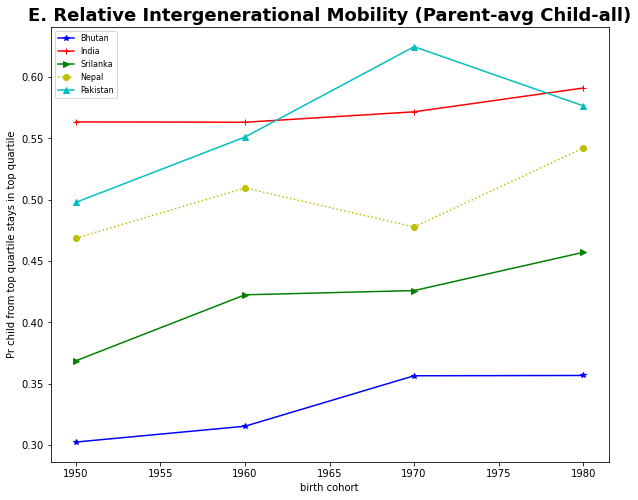

In [15]:
cohort = [1950,1960,1970,1980]
rel_gdim_bh=list(gdim1[gdim1.country == 'Bhutan'].Q4Q4)
rel_gdim_ind=list(gdim1[gdim1.country == 'India'].Q4Q4)
rel_gdim_sri=list(gdim1[gdim1.country == 'Sri Lanka'].Q4Q4)
rel_gdim_nep=list(gdim1[gdim1.country == 'Nepal'].Q4Q4)
rel_gdim_pak=list(gdim1[gdim1.country == 'Pakistan'].Q4Q4)
plt.figure(figsize=(10,8))
plt.title('E. Relative Intergenerational Mobility (Parent-avg Child-all)', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.plot(cohort, rel_gdim_bh , 'b*-', label='Bhutan')
plt.plot(cohort, rel_gdim_ind, 'r+-',label='India')
plt.plot(cohort, rel_gdim_sri, 'g>-',label='Srilanka')
plt.plot(cohort, rel_gdim_nep, 'yo:',label='Nepal')
plt.plot(cohort,rel_gdim_pak , 'c^-',label='Pakistan')
plt.legend(loc='best',prop={'size': 8})
plt.xlabel('birth cohort')
plt.ylabel('Pr child from top quartile stays in top quartile')
plt.show()

# Probability of a child from bottom half ends up in top quartile


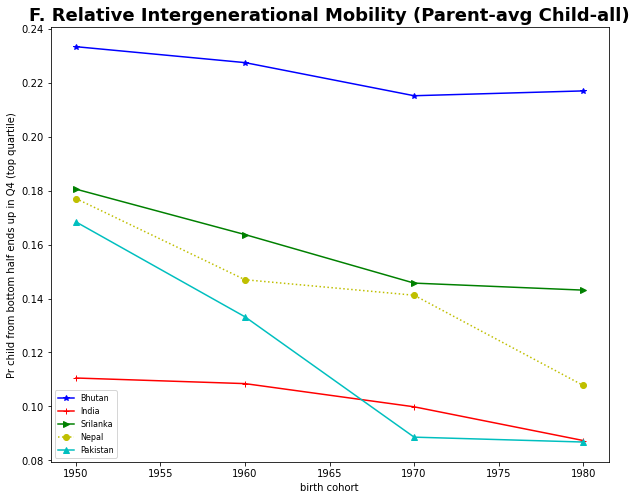

In [16]:
cohort = [1950,1960,1970,1980]
rel_gdim_bh=list(gdim1[gdim1.country == 'Bhutan'].BHQ4)
rel_gdim_ind=list(gdim1[gdim1.country == 'India'].BHQ4)
rel_gdim_sri=list(gdim1[gdim1.country == 'Sri Lanka'].BHQ4)
rel_gdim_nep=list(gdim1[gdim1.country == 'Nepal'].BHQ4)
rel_gdim_pak=list(gdim1[gdim1.country == 'Pakistan'].BHQ4)
plt.figure(figsize=(10,8))
plt.title('F. Relative Intergenerational Mobility (Parent-avg Child-all)', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.plot(cohort, rel_gdim_bh , 'b*-', label='Bhutan')
plt.plot(cohort, rel_gdim_ind, 'r+-',label='India')
plt.plot(cohort, rel_gdim_sri, 'g>-',label='Srilanka')
plt.plot(cohort, rel_gdim_nep, 'yo:',label='Nepal')
plt.plot(cohort,rel_gdim_pak , 'c^-',label='Pakistan')
plt.legend(loc='best',prop={'size': 8})
plt.xlabel('birth cohort')
plt.ylabel('Pr child from bottom half ends up in Q4 (top quartile)')
plt.show()

# Probability of a child from bottom half ends up in third quartile

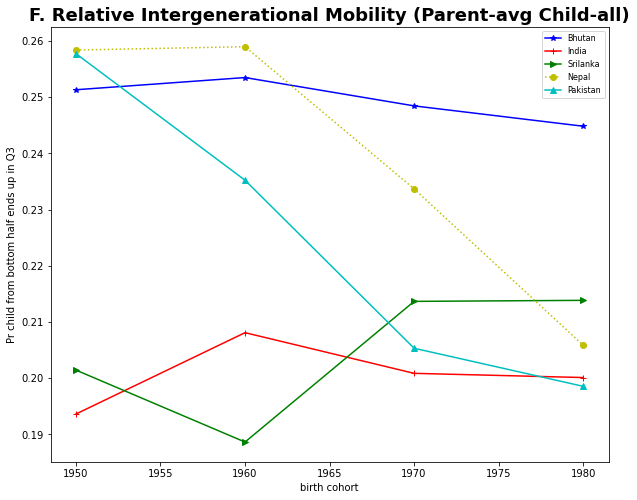

In [17]:
cohort = [1950,1960,1970,1980]
rel_gdim_bh=list(gdim1[gdim1.country == 'Bhutan'].BHQ3)
rel_gdim_ind=list(gdim1[gdim1.country == 'India'].BHQ3)
rel_gdim_sri=list(gdim1[gdim1.country == 'Sri Lanka'].BHQ3)
rel_gdim_nep=list(gdim1[gdim1.country == 'Nepal'].BHQ3)
rel_gdim_pak=list(gdim1[gdim1.country == 'Pakistan'].BHQ3)
plt.figure(figsize=(10,8))
plt.title('F. Relative Intergenerational Mobility (Parent-avg Child-all)', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.plot(cohort, rel_gdim_bh , 'b*-', label='Bhutan')
plt.plot(cohort, rel_gdim_ind, 'r+-',label='India')
plt.plot(cohort, rel_gdim_sri, 'g>-',label='Srilanka')
plt.plot(cohort, rel_gdim_nep, 'yo:',label='Nepal')
plt.plot(cohort,rel_gdim_pak , 'c^-',label='Pakistan')
plt.legend(loc='best',prop={'size': 8})
plt.xlabel('birth cohort')
plt.ylabel('Pr child from bottom half ends up in Q3')
plt.show()